In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/MachineLearning/praktikum/prak4/"

In [4]:
# membaca data file CSV
df = pd.read_csv(path + '/data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [6]:
#cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [7]:
print("\n=== NILAI UNIK SETIAP KOLOM ===")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


=== NILAI UNIK SETIAP KOLOM ===
ID: [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190

In [8]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

print("\nUkuran Data:")
print("X:", X.shape)
print("y:", y.shape)


Ukuran Data:
X: (1000, 5)
y: (1000,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nData latih:", X_train.shape)
print("Data uji  :", X_test.shape)


Data latih: (800, 5)
Data uji  : (200, 5)


In [10]:
# Tentukan kolom numerik dan biner
feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Status', 'Kelamin', 'Memiliki_Mobil']

In [11]:
# Scale hanya fitur numerik, fitur biner langsung passthrough
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("\nModel Logistic Regression berhasil dilatih.")



Model Logistic Regression berhasil dilatih.


In [12]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\n=== Evaluasi Model ===")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall   :", round(recall_score(y_test, y_pred), 4))
print("F1-Score :", round(f1_score(y_test, y_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba), 4))



=== Evaluasi Model ===
Accuracy : 0.93
Precision: 0.9829
Recall   : 0.9055
F1-Score : 0.9426
ROC-AUC  : 0.9769


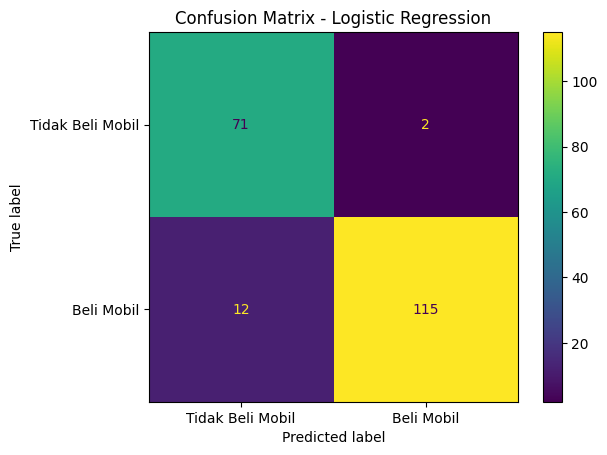

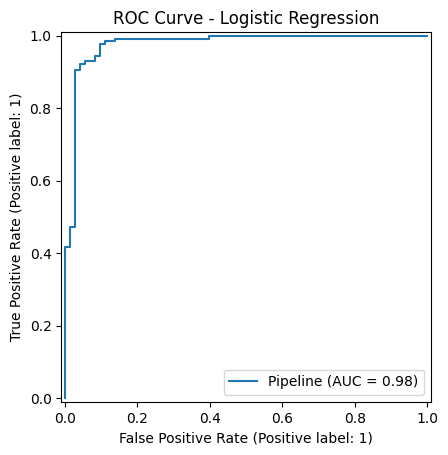

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Tidak Beli Mobil', 'Beli Mobil']  # disesuaikan dengan dataset kamu
).plot(values_format='d')

plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=['Tidak Beli Mobil (0)', 'Beli Mobil (1)']
))

                      precision    recall  f1-score   support

Tidak Beli Mobil (0)       0.86      0.97      0.91        73
      Beli Mobil (1)       0.98      0.91      0.94       127

            accuracy                           0.93       200
           macro avg       0.92      0.94      0.93       200
        weighted avg       0.94      0.93      0.93       200



In [15]:
# VALIDASI SILANG (CROSS VALIDATION)
scores = cross_val_score(clf, X, y, cv=5)
print("\nAkurasi Tiap Fold:", scores)
print("Rata-rata Akurasi:", np.mean(scores))
print("Standar Deviasi  :", np.std(scores))


Akurasi Tiap Fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata Akurasi: 0.9059999999999999
Standar Deviasi  : 0.06681317235396023


In [16]:
# PREDIKSI DATA BARU
data_baru = pd.DataFrame({
    'Usia': [25, 40],
    'Status': [1, 2],
    'Kelamin': [1, 0],          # 1 = laki-laki, 0 = perempuan
    'Memiliki_Mobil': [0, 1],   # 0 = belum punya mobil, 1 = sudah punya
    'Penghasilan': [150, 300]   # satuan sesuai dataset
})

# Prediksi dengan model yang telah dilatih
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

# Gabungkan hasil ke dalam dataframe baru
hasil = data_baru.copy()
hasil['Prob_BeliMobil'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred

display(hasil)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_BeliMobil,"Pred (0=Tidak,1=Ya)"
0,25,1,1,0,150,0.011539,0
1,40,2,0,1,300,0.978253,1
